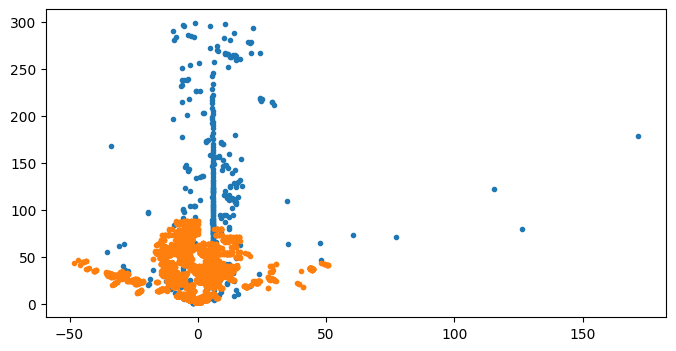

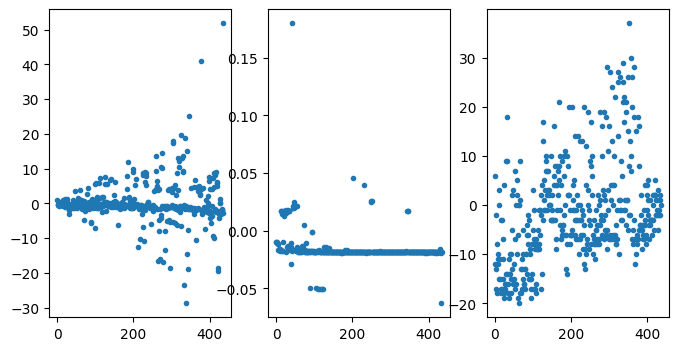

In [48]:
import numpy as np 
import matplotlib.pyplot as plt 

path = "/media/charles/Charles/charles/DataSet/Dual_Radar/training/ars548/001100.bin"
data_ = np.fromfile(path, dtype=np.float32).reshape([-1, 5])

path2= "/media/charles/Charles/charles/DataSet/Dual_Radar/training/arbe/001100.bin"
data_2 = np.fromfile(path2, dtype=np.float32).reshape([-1, 5])

# print(data_[0:10,:])

plt.figure(figsize=(8,4))
plt.plot(data_[:, 1], data_[:, 0], '.')
plt.plot(data_2[:, 0], data_2[:, 1], '.')

plt.figure(figsize=(8,4))
plt.subplot(131)
plt.plot(data_[:, 2],'.')
plt.subplot(132)
plt.plot(data_[:, 3],'.')
plt.subplot(133)
plt.plot(data_[:, 4],'.')
